<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/project/blob/main/try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_csv("/content/diabetes (1).csv")

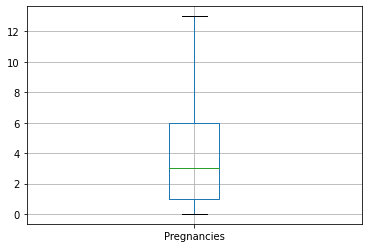

In [ ]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['Pregnancies'].quantile(.25)
Q3 = df['Pregnancies'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Pregnancies'].between(q1, q3)]

boxplot = df.boxplot(column=['Pregnancies'])

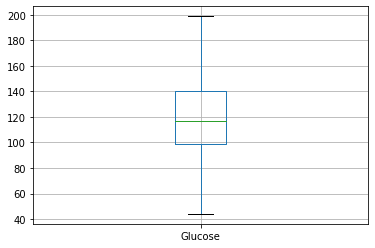

In [ ]:
Q1 = df['Glucose'].quantile(.25)
Q3 = df['Glucose'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Glucose'].between(q1, q3)]

boxplot = df.boxplot(column=['Glucose'])

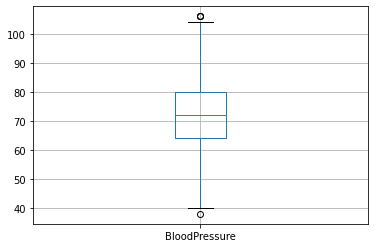

In [ ]:
Q1 = df['BloodPressure'].quantile(.25)
Q3 = df['BloodPressure'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BloodPressure'].between(q1, q3)]

boxplot = df.boxplot(column=['BloodPressure'])

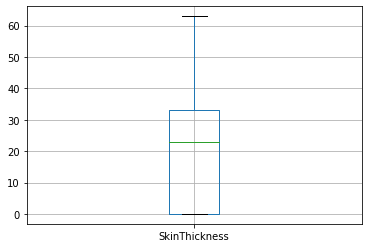

In [ ]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['SkinThickness'].quantile(.25)
Q3 = df['SkinThickness'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['SkinThickness'].between(q1, q3)]

boxplot = df.boxplot(column=['SkinThickness'])

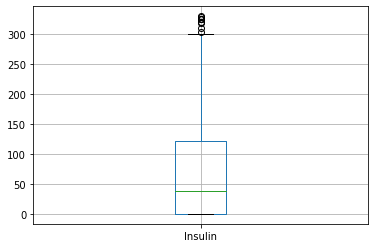

In [ ]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['Insulin'].quantile(.25)
Q3 = df['Insulin'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['Insulin'].between(q1, q3)]

boxplot = df.boxplot(column=['Insulin'])

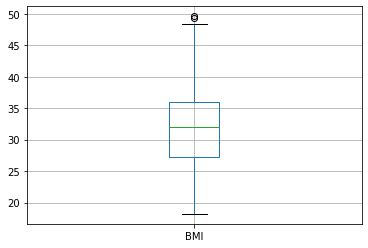

In [ ]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['BMI'].quantile(.25)
Q3 = df['BMI'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['BMI'].between(q1, q3)]

boxplot = df.boxplot(column=['BMI'])

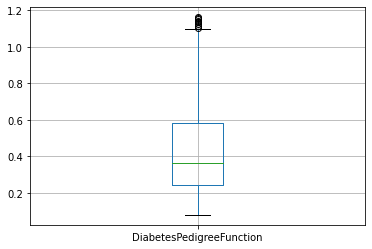

In [ ]:
# Identifying outliers with the 1.5xIQR rule
Q1 = df['DiabetesPedigreeFunction'].quantile(.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(.75)
q1 = Q1-1.5*(Q3-Q1)
q3 = Q3+1.5*(Q3-Q1)

df = df[df['DiabetesPedigreeFunction'].between(q1, q3)]

boxplot = df.boxplot(column=['DiabetesPedigreeFunction'])

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.811437,119.208655,72.143740,20.471406,67.936631,31.928594,0.426577,33.165379,0.310665
std,3.246574,29.304287,11.306429,15.304202,83.324373,6.368231,0.244432,11.756778,0.463124
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.250000,0.240000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,38.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.900000,0.583000,40.500000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,81.000000,1.000000


In [ ]:
dataset = df.copy(deep = True)
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               182
Insulin                     310
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(), inplace = True)
dataset['Insulin'].fillna(dataset['Insulin'].mean(), inplace = True)

# showing the count of Nans
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
x = dataset
y = dataset.Outcome

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =sc.fit_transform(x)#only rearangeng x


from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(x)

In [ ]:
#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, stratify=y)

In [28]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=knn_grid.fit(X_train, y_train)
print(grid_search.best_params_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 5}


In [29]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

#save best model
knn_best = knn_grid.best_estimator_
print('model saved')

model saved


In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}


In [27]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')
rfc1.fit(X_train, y_train)

#save best model
rf_best = CV_rfc.best_estimator_
print('model saved')

model saved


In [30]:
from xgboost import XGBClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search_XB = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search_XB.fit(X_train, y_train)

print(grid_search_XB.best_estimator_)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
XGBClassifier(max_depth=2, n_estimators=140, nthread=4, seed=42)


In [31]:
xb = XGBClassifier(max_depth=2, n_estimators=140, nthread=4, seed=42)
xb.fit(X_train, y_train)

#save best model
xb_best = grid_search_XB.best_estimator_
print('model saved')

model saved


In [32]:
#test the three models with the test data and print their accuracy scores
print('knn: {}:'.format(knn_best.score(X_test, y_test)))
print('rf: {}:'.format(rf_best.score(X_test, y_test)))
print('XGBClassifier: {}'.format(xb_best.score(X_test, y_test)))

knn: 0.9923076923076923:
rf: 0.9923076923076923:
XGBClassifier: 0.9923076923076923


In [33]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best), ('XGBClassifier', xb_best)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.9923076923076923